# Figure preparation 

In [1]:
# set the envoiroment
import pandas as pd
import numpy as np 

## Figure 2

In [2]:
x = np.linspace(0,1,401)
figure_2 = pd.DataFrame({"X":x})
figure_2["-Jp/L∆Gc"] = 0
figure_2["Jc/L∆Gc"] = 0
figure_2["-Jp/Jc"] = 0
figure_2["Jp1/Jp"] = 0
figure_2["Jp2/Jp"] = 0
figure_2["n"] = 0
figure_2["η"] = 0
φ = 0.2
n1 = 1
n2 = 2
L2= 1
L1=1
for i in range(len(figure_2)):
    # The formula -Jp/(L∆Gc)= (111-φ)∙n1∙(1-n1∙X)+φ∙n2-φ∙(n2 )^2∙X was used for calculation of -Jp/(L∆Gc).
    figure_2["-Jp/L∆Gc"].iloc[i] = (1-φ)*n1*(1-n1*figure_2["X"].iloc[i]) + φ*n2*(1-n2*figure_2["X"].iloc[i])
    # The formula Jc/(L∆Gc)= (1-φ)∙(1-n1∙X)+φ∙(1-n2∙X) was used for calculations of Jc/(L∆Gc).
    figure_2["Jc/L∆Gc"].iloc[i] = (1-φ)*(1-n1*figure_2["X"].iloc[i]) + φ*(1-n2*figure_2["X"].iloc[i])
    # The formula -Jp/Jc = (-Jp/L∆Gc)/(Jc/L∆Gc) was used for calculation of -Jp/Jc.
    figure_2["-Jp/Jc"].iloc[i] = (figure_2["-Jp/L∆Gc"].iloc[i])/(figure_2["Jc/L∆Gc"].iloc[i])
    # The formula -Jp1/Jp =(1-φ)∙n1∙(1-n1∙X)/(-Jp/L∆Gc) was used for calculation of -Jp1/Jp.
    figure_2["Jp1/Jp"].iloc[i] = (1-φ)*n1*(1-n1*figure_2["X"].iloc[i])/figure_2["-Jp/L∆Gc"].iloc[i]
   # The formula -Jp2/Jp =φ∙n2∙(1-n2∙X)/(-Jp/L∆Gc) was used for calculation of -Jp2/Jp
    figure_2["Jp2/Jp"].iloc[i] = φ*n2*(1-n2*figure_2["X"].iloc[i])/figure_2["-Jp/L∆Gc"].iloc[i]
    # The formula n = ((1-φ)∙n1∙(1-n1∙X)+φ∙n2∙(1-n_2∙X))/((1-φ)∙(1-n1∙X)+φ∙(1-n2∙X)) was used for calculation of n.
    figure_2["n"].iloc[i] = ((1-φ)*n1*(1-n1*figure_2["X"].iloc[i])+φ*n2*(1-n2*figure_2["X"].iloc[i]))/((1-φ)*(1-n1*figure_2["X"].iloc[i])+φ*(1-n2*figure_2["X"].iloc[i]))
    # The formula η = -Jp/Jc∙X was used to caluculate of η.
    figure_2["η"].iloc[i] = figure_2["-Jp/Jc"].iloc[i]*figure_2["X"].iloc[i]

C:\Users\yzhang2\Anaconda3\envs\archeapy36\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\yzhang2\Anaconda3\envs\archeapy36\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\yzhang2\Anaconda3\envs\archeapy36\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


In [3]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
import numpy as np

fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (7,3))
# formatter = matplotlib.ticker.FormatStrFormatter('%1.3f')#This one is used to set the accurate of y axis
# ax.yaxis.set_major_formatter(formatter)
ax1.plot(figure_2["X"],figure_2["-Jp/L∆Gc"],color='black',label = "-Jp/L∆Gc")
ax1.plot(figure_2["X"],figure_2["-Jp/Jc"],color='magenta',label = "-Jp/Jc(n=-Jp/Jc)")
ax1.plot(figure_2["X"],figure_2["Jp1/Jp"],color='blue',label = "Jp1/Jp")
ax1.plot(figure_2["X"],figure_2["Jp2/Jp"],color='red',label = "Jp2/Jp")
# ax.plot(figure_2["X"],figure_2["n"],color='green',label = "n")
ax1.plot(figure_2["X"],figure_2["η"],color='purple',label = "η")

ax1.legend(prop={"size":10}, loc='lower left', borderaxespad=0.2)


ax1.text(-0.15, 2, 'A',  fontsize = 14, color ="black")
ax1.set_xticks(np.arange(-0.0, 1.1, step=0.2))
ax1.set_ylim(-2.0, 2)
ax1.set_xlim (0,1.0)
ax1.set_xlabel("Force ratio X", fontsize = 12, fontweight = "bold",labelpad=6)
plt.yticks(fontsize = 11,fontweight = "bold")
plt.xticks(fontsize = 11,fontweight = "bold")
ax2.plot(figure_2["-Jp/L∆Gc"],figure_2["n"],color='black')
ax2.set_xticks(np.arange(-0.0, 1.3, step=0.2))
ax2.set_yticks(np.arange(-0.0, 1.3, step=0.2))

ax2.text(-0.33, 1.3, 'B',  fontsize = 14, color ="black")
ax2.set_ylim(0.0, 1.3)
ax2.set_xlim (0,1.3)
ax2.set_xlabel("ATP synthesis flux", fontsize = 12, fontweight = "bold",labelpad=6)
ax2.set_ylabel("Flux ratio stoichiometry", fontsize = 12, fontweight = "bold",labelpad=4)

plt.yticks(fontsize = 11,fontweight = "bold")
plt.xticks(fontsize = 11,fontweight = "bold")
plt.tight_layout()
plt.savefig('../figures/Figure 2', dpi=300)
plt.show()

<Figure size 700x300 with 2 Axes>

## Figure 3

In [4]:

x = np.linspace(0,1,401)
figure_3 = pd.DataFrame({"X":x})

figure_3["-Jp/LΔGc for Z = 0.5"] = 0
figure_3["-Jp/LΔGc for Z = 1"] = 0
figure_3["-Jp/LΔGc for Z = 2"] = 0
figure_3["-Jp/LΔGc for Z = 4"] = 0
figure_3["-Jp/LΔGc total"] = 0
figure_3["-Jp/LΔGc for Optimal Z = q/2X"] = 0
# figure_3["Z(maximal ATP syntheis flux) = q/2X"] = 0

figure_3["-Jp/Jc for Z = 0.5"] = 0
figure_3["-Jp/Jc for Z = 1"] = 0
figure_3["-Jp/Jc for Z = 2"] = 0
figure_3["-Jp/Jc for Z = 4"] = 0
figure_3["-Jp/Jc total"] = 0
figure_3["-Jp/Jc for Optimal Z = q/2X"] = 0
# figure_3["Z(maximal ATP syntheis flux) = q/2X"] = 0
q = 0.9
Z1 = 0.5
Z2 = 1
Z3 = 2
Z4 = 4
for i in range(len(figure_3)):
    # The formula -Jp/L∆Gc= L∙∆Gc∙q∙z∙(1-z/q∙X)/(L∙∆Gc) = q∙z∙(1-z/q∙X) = z∙(q-z∙X) was used to calculate -Jp/LΔGc
    figure_3["-Jp/Jc for Z = 0.5"].iloc[i] = (Z1*q-Z1*Z1*figure_3["X"].iloc[i])/(1-q*Z1*figure_3["X"].iloc[i])
    figure_3["-Jp/Jc for Z = 1"].iloc[i] = (Z2*q-Z2*Z2*figure_3["X"].iloc[i])/(1-q*Z2*figure_3["X"].iloc[i])
    figure_3["-Jp/Jc for Z = 2"].iloc[i] = (Z3*q-Z3*Z3*figure_3["X"].iloc[i])/(1-q*Z3*figure_3["X"].iloc[i])
    figure_3["-Jp/Jc for Z = 4"].iloc[i] = (Z4*q-Z4*Z4*figure_3["X"].iloc[i])/(1-q*Z4*figure_3["X"].iloc[i])
    figure_3["-Jp/Jc total"].iloc[i] = ((figure_3["-Jp/Jc for Z = 0.5"].iloc[i]+figure_3["-Jp/Jc for Z = 1"].iloc[i]+figure_3["-Jp/Jc for Z = 2"].iloc[i]+figure_3["-Jp/Jc for Z = 4"].iloc[i]))/((1-q*Z1*figure_3["X"].iloc[i])+(1-q*Z2*figure_3["X"].iloc[i])+(1-q*Z3*figure_3["X"].iloc[i]))
    figure_3["-Jp/Jc for Optimal Z = q/2X"].iloc[i] = (q/(2*figure_3["X"].iloc[i])*q-q/(2*figure_3["X"].iloc[i])*q/(2*figure_3["X"].iloc[i])*figure_3["X"].iloc[i])/(1-q*q/(2*figure_3["X"].iloc[i])*figure_3["X"].iloc[i])

for i in range(len(figure_3)):
    # The formula -Jp/L∆Gc= L∙∆Gc∙q∙z∙(1-z/q∙X)/(L∙∆Gc) = q∙z∙(1-z/q∙X) = z∙(q-z∙X) was used to calculate -Jp/LΔGc
    figure_3["-Jp/LΔGc for Z = 0.5"].iloc[i] = Z1*(q-Z1*figure_3["X"].iloc[i])
    figure_3["-Jp/LΔGc for Z = 1"].iloc[i] = Z2*(q-Z2*figure_3["X"].iloc[i])
    figure_3["-Jp/LΔGc for Z = 2"].iloc[i] = Z3*(q-Z3*figure_3["X"].iloc[i])
    figure_3["-Jp/LΔGc for Z = 4"].iloc[i] = Z4*(q-Z4*figure_3["X"].iloc[i])
    figure_3["-Jp/LΔGc total"].iloc[i] = figure_3["-Jp/LΔGc for Z = 0.5"].iloc[i] + figure_3["-Jp/LΔGc for Z = 1"].iloc[i] + figure_3["-Jp/LΔGc for Z = 2"].iloc[i]
    figure_3["-Jp/LΔGc for Optimal Z = q/2X"].iloc[i] = (q/(2*figure_3["X"].iloc[i]))*(q-q/(2*figure_3["X"].iloc[i])*figure_3["X"].iloc[i])


C:\Users\yzhang2\Anaconda3\envs\archeapy36\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\yzhang2\Anaconda3\envs\archeapy36\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\yzhang2\Anaconda3\envs\archeapy36\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\yzhang2\Anaconda3\envs\archeapy36\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\yzhang2\Anaconda3\envs\archeapy36\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


In [5]:
x = np.linspace(0,0.555,223)
figure_3_x = pd.DataFrame({"X":x})
figure_3_x['-Jp/Jc for Z = 2'] = 0
for i in range (len(figure_3)):
    if i <= 222:
        figure_3_x['-Jp/Jc for Z = 2'].iloc[i]= figure_3['-Jp/Jc for Z = 2'].iloc[i]


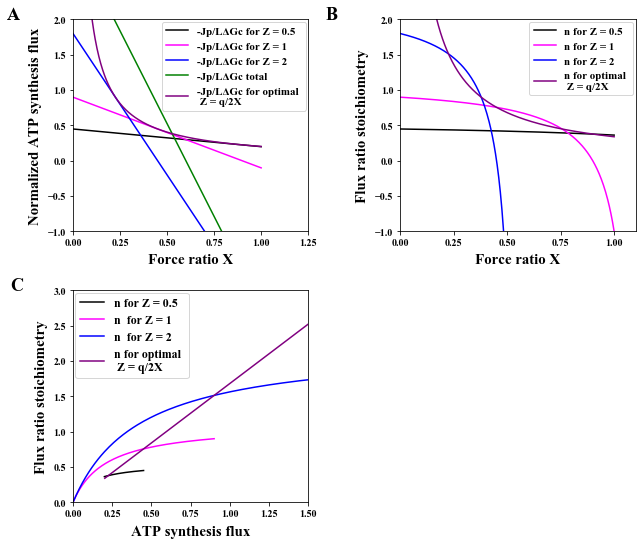

In [6]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize = (9,7.68))

ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1)
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=1)


ax1.plot(figure_3["X"],figure_3["-Jp/LΔGc for Z = 0.5"],color='black',label = "-Jp/LΔGc for Z = 0.5")
ax1.plot(figure_3["X"],figure_3["-Jp/LΔGc for Z = 1"],color='magenta',label = "-Jp/LΔGc for Z = 1")
ax1.plot(figure_3["X"],figure_3["-Jp/LΔGc for Z = 2"],color='blue',label = "-Jp/LΔGc for Z = 2")
# ax1.plot(figure_3["X"],figure_3["-Jp/LΔGc for Z = 4"],color='red',label = "-Jp/LΔGc for Z = 4")
ax1.plot(figure_3["X"],figure_3["-Jp/LΔGc total"],color='green',label = "-Jp/LΔGc total")
ax1.plot(figure_3["X"],figure_3["-Jp/LΔGc for Optimal Z = q/2X"],color='purple',label = "-Jp/LΔGc for optimal \n Z = q/2X")

ax1.legend(prop={"size":11}, loc='upper right', borderaxespad=0.2)
ax1.text(-0.35, 2, 'A',  fontsize = 18, color ="black")
# ax1.set_yticklabels(["-1.0","-0.5","0","0.5","1.0","1.5","2.0"],fontsize = 10,fontweight = "bold")
ax1.set_yticks(np.arange(-1.0, 2.5, step=0.5))
ax1.set_ylim(-1.0, 2)
ax1.set_xlim (0,1.25)
ax1.set_xlabel("Force ratio X", fontsize = 15, fontweight = "bold",labelpad=6)
ax1.set_ylabel("Normalized ATP synthesis flux", fontsize = 15, fontweight = "bold",labelpad=6)

ax2.plot(figure_3["X"],figure_3["-Jp/Jc for Z = 0.5"],color='black',label = "n for Z = 0.5")
ax2.plot(figure_3["X"],figure_3["-Jp/Jc for Z = 1"],color='magenta',label = "n for Z = 1")
ax2.plot(figure_3_x["X"],figure_3_x["-Jp/Jc for Z = 2"],color='blue',label = "n for Z = 2")
# ax2.plot(figure_3["X"],figure_3["-Jp/Jc for Z = 4"],color='red',label = "n for Z = 4")
# ax.plot(figure_3["X"],figure_3["-Jp/Jc total"],color='green',label = "-Jp/Jc total")
ax2.plot(figure_3["X"],figure_3["-Jp/Jc for Optimal Z = q/2X"],color='purple', label = "n for optimal \n Z = q/2X")

ax2.legend(prop={"size":11}, loc='upper right', borderaxespad=0.2)
ax2.text(-0.35, 2, 'B',  fontsize = 18, color ="black")
# ax2.set_yticklabels(["-1.0","-0.5","0","0.5","1.0","1.5","2.0"],fontsize = 10,fontweight = "bold")
ax2.set_yticks(np.arange(-1.0, 2.5, step=0.5))
ax2.set_ylim(-1.0, 2)
ax2.set_xlim (0,1.1)
ax2.set_xlabel("Force ratio X", fontsize = 15, fontweight = "bold",labelpad=6)
ax2.set_ylabel("Flux ratio stoichiometry", fontsize = 15, fontweight = "bold",labelpad=6)


ax3.plot(figure_3["-Jp/LΔGc for Z = 0.5"],figure_3["-Jp/Jc for Z = 0.5"],color='black',label = "n for Z = 0.5")
ax3.plot(figure_3["-Jp/LΔGc for Z = 1"],figure_3["-Jp/Jc for Z = 1"],color='magenta',label = "n  for Z = 1")
ax3.plot(figure_3["-Jp/LΔGc for Z = 2"],figure_3["-Jp/Jc for Z = 2"],color='blue',label = "n  for Z = 2")
# ax3.plot(figure_3["-Jp/LΔGc for Z = 4"],figure_3["-Jp/Jc for Z = 4"],color='red',label = "n  for Z = 4")
ax3.plot(figure_3["-Jp/LΔGc for Optimal Z = q/2X"],figure_3["-Jp/Jc for Optimal Z = q/2X"],color='purple',label = "n for optimal \n Z = q/2X")

ax3.legend(prop={"size":12,"weight":"bold"}, loc='upper left', borderaxespad=0.2)
ax3.text(-0.4, 3, 'C',  fontsize = 18, color ="black")

ax3.set_yticks(np.arange(0, 3.1, step=0.5))

ax3.set_xticks(np.arange(0, 1.51, step=0.25))
ax3.set_ylim([-0,3])
ax3.set_xlim ([0,1.5])
ax3.set_xlabel("ATP synthesis flux", fontsize = 15, fontweight = "bold",labelpad=6)
ax3.set_ylabel("Flux ratio stoichiometry", fontsize = 15, fontweight = "bold",labelpad=6)

matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
# matplotlib.rc('ytick', labelsize=12)

plt.tight_layout()

plt.savefig('../figures/Figure 3.png', dpi=300)
plt.show()